# Разведочный анализ данных (exploratory data analysis, EDA)

# Подготовка

### Импорты

In [1]:
import pandas as pd
import numpy as np

In [2]:
import json

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from collections import Counter

### Опции

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)
# разделитель ',' и два знака после запятой у чисел с плавающей точкой

In [ ]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

In [ ]:
# Сброс ограничений на число столбцов
pd.reset_option('display.max_columns')

In [ ]:

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)# Установите для отображения самой большой линии

In [ ]:
pd.reset_option('display.max_colwidth')

#### опции для графики

In [5]:
large = 16; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

In [6]:
sns.set_palette('deep') 
sns.set_style("whitegrid")

## Заливка данных

In [ ]:
# полный датафрейм со всеми столбцами
full_df = pd.read_csv('region_roles_26.05.22_CSV.csv', encoding='windows-1251', sep=';')

In [7]:
list_columns = [
    'id',
    'name',
    'salary',
    'snippet',
    'schedule',
    'description',
    'experience',
    'key_skills',
    'specializations',
    'region'
]

In [8]:
# dataframe после анализа содержимого столбцов
df = pd.read_csv('region_roles_26.05.22_CSV.csv', usecols=list_columns, encoding='windows-1251', sep=';')

5,7s

In [ ]:
df.head()

# EDA (3 этапа)

## 1. Первичный анализ датасета

- Знакомимся с таблицей данных
- Оцениваем ее объем
- Оцениваем признаки объектов, хранящихся в ней
- Выявляем наличие пропусков

### общая информация

In [ ]:
df.head(2)

In [ ]:
df.info()

In [ ]:
df.shape

In [11]:
df.isna().sum()
# поиск пропущенных значений

id                     0
name                   0
salary             32066
snippet                0
schedule               0
description            0
experience             0
key_skills             0
specializations        0
region                 0
dtype: int64

In [ ]:
# список столбцов в виде list()
df.columns.tolist()

In [9]:
df.duplicated().sum()

233

In [16]:
dupl = df[df.duplicated() == True]

удаляем дубликаты

In [10]:
df = df.drop_duplicates()

In [ ]:
df.head(1)

### Что в столбцах?

In [ ]:
df.premium.value_counts()
# удалить

In [ ]:
df.name.value_counts()

In [ ]:
df.department.value_counts()
# delete

In [ ]:
df.has_test.value_counts()
# delete

In [ ]:
df.response_letter_required.value_counts()
# delete

In [ ]:
df.area.value_counts()
# delete

In [ ]:
df.salary.value_counts()

In [ ]:
df.type.value_counts()
# delete

In [ ]:
df.address.value_counts()
# delete

In [ ]:
df.response_url.value_counts()
# delete

In [ ]:
df.sort_point_distance.value_counts()
# delete

In [ ]:
df.archived.value_counts()
# delete

In [ ]:
df.insider_interview.value_counts()
# delete

In [ ]:
df.url.value_counts()
# delete

In [ ]:
df.alternate_url.value_counts()
# delete

In [ ]:
df.relations.value_counts()
# delete

In [ ]:
df.employer.value_counts()
# delete

In [ ]:
df.snippet.value_counts()

In [ ]:
df.contacts.value_counts()
# delete

In [ ]:
df.schedule.value_counts()

In [ ]:
df.working_days.value_counts()
# delete

In [ ]:
df.working_time_intervals.value_counts()
# delete

In [ ]:
df.working_time_modes.value_counts()
# delete

In [ ]:
df.accept_temporary.value_counts()
# delete

In [ ]:
df.experience.value_counts()

In [ ]:
df.region.value_counts()

In [ ]:
df.immediate_redirect_url.value_counts()
# delete

#### какие столбцы остаются для анализа

In [ ]:
list_columns = [
    'id',
    'name',
    'salary',
    'snippet',
    'schedule',
    'description',
    'experience',
    'key_skills',
    'specializations',
    'region',
    'published_at',
    'created_at'
]

In [6]:
df.isna().sum()
# поиск пропущенных значений

id                     0
name                   0
salary             32066
published_at           0
created_at             0
snippet                0
schedule               0
description            0
experience             0
key_skills             0
specializations        0
region                 0
dtype: int64

In [7]:
df.salary

0                                                      NaN
1                                                      NaN
2                                                      NaN
3        {'from': 26000, 'to': None, 'currency': 'RUR',...
4        {'from': 20000, 'to': 20000, 'currency': 'RUR'...
                               ...                        
69651                                                  NaN
69652                                                  NaN
69653                                                  NaN
69654    {'from': 180000, 'to': None, 'currency': 'RUR'...
69655                                                  NaN
Name: salary, Length: 69656, dtype: object

 #### !!!!! обрабатываем пропуски в колонке salary

### Преобразовываем строку JSON

json.loads
Считывание строки в формате JSON в объект Python

json.dumps
Преобразование объекта в строку в формате JSON. Функция dumps() модуля json сериализирует объект Python obj в строку str формата JSON. Сериализация объектов Python выполняется согласно таблице преобразования

In [11]:
# Преобразование json с dumps
def text_to_json_dumps(text):
    text = text.replace("'", '"')
    try:
        return json.loads(json.dumps(text))
    except:
        print('error')

In [19]:
# Преобразование json с заменой подстроки
def text_to_json_str(text):
    try:
        return json.loads(text.replace('"', '').replace("'", '"'))
    except:
        print('error')
        # return []

### Очищаем dataframe от данных, не относящихся к IT

Работаем со столбцом specializations, чтобы очистить dataframe от данных, не относящихся к IT, что позволит точнее провести описательную статистику

In [ ]:
df.specializations

Преобразуем данные json и сохраним их в столбце specializations_jsn

In [12]:
df['specializations_jsn'] = df['specializations'].apply(text_to_json_dumps)

Создаем функцию, вытаскивающую тег 'profarea_id'. Это Идентификатор профессиональной области, в которую входит специализация. 1 - Информационные технологии, интернет, телеком

In [13]:
def get_tag_profarea_id(text):
    text = json.loads(text)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['profarea_id'])
            return out
    except:
        print('error')


Создаем новый столбец 'profarea_id'

In [14]:
df['profarea_id'] = df.specializations_jsn.apply(get_tag_profarea_id)

In [ ]:
df['profarea_id'].value_counts()

Создаем функцию поиска элемента '1' в списке для того, чтобы сепарировать строки dataframe со специализацией 1 - Информационные технологии, интернет, телеком

In [15]:
def find_1(lst):
    return '1' in lst

Создаем столбец 'profarea_id_1'

In [16]:
df['profarea_id_1'] = df['profarea_id'].apply(find_1)

In [17]:
df.profarea_id_1.value_counts()

True     50202
False    19221
Name: profarea_id_1, dtype: int64

Разделяем dataframe по признаку отношения специализации к IT

In [18]:
it_true = df[df['profarea_id_1'] == 1]

In [19]:
it_false = df[df['profarea_id_1'] == 0]

In [20]:
it_true.shape

(50202, 13)

In [21]:
it_false.shape

(19221, 13)

В результате мы видим, что значительная часть строк не содержит идентификатор информационных технологий. Оставляем пока строки True и дополнительно разбираемся со строками False 

#### Разбираемся с it_false - есть ли там it-специальности

In [ ]:
df.head(2)

In [22]:
# для упрощения обработки приводим строки к нижнему регистру
df['name'] = df['name'].str.lower()

In [22]:
df.name

0               консультант по информационной безопасности
1        product manager (разработка по в сфере информа...
2                   эксперт по компьютерной криминалистике
3         ведущий специалист по информационным технологиям
4                          специалист по защите информации
                               ...                        
69651    начальник отдела по защите информации и информ...
69652                   исполнительный директор (it-сфера)
69653    ведущий консультант по информационной безопасн...
69654                                  начальник it отдела
69655                                       программист 1с
Name: name, Length: 69656, dtype: object

Создаем список подстрок, не относящихся к IT-специализации

In [23]:
lst_not_it = [
    'дизай',
    'недви',
    'персон', 
    'кадр',
    'рекру',
    'hr',
    'продаж',
    'риэл',
    'риел',
    'контент',
    'зал',
    'артист',
    'smm',
    'инструкт',
    'тренер',
    'креатив',
    'ретуш',
    'аренд',
    'псих',
    'табел',
    'лаборат',
    'автор',
    'смет',
    'менеджер по работе с клиентами',
    'компенсац',
    'обуч',
    'помещен',
    'межев',
    'ипоте',
    'маркетол',
    'начинающий специалист',
    'блогер',
    'кдп',
    'recruiter',
    'труд',
    'специалист по работе с клиентами',
    'штат',
    'продавец',
    'офис',
    'брокер',
    'смм',
    'ресеч',
    'торг',
    'менедж',
    'воин',
    'новострой',
    'pr',
    'маркетинг',
    'реклам',
    'арт',
    'агент',
    'строи',
    'энергет'
    ]


Сепарируем столбец 'name' на 2 dataframe: 1) с наименованиями из списка 2) остальное

In [24]:
pat = '|'.join(lst_not_it)
temp_df = it_false[it_false['name'].str.contains(pat)]
it_not_false = it_false[~it_false.index.isin(temp_df.index)]

In [25]:
temp_df.shape

(15231, 13)

In [26]:
# Проверка количества строк
temp_df.shape[0] + it_not_false.shape[0]

19221

In [40]:
it_not_false.shape

(4133, 15)

#### объединяем очищенные dataframe

In [27]:
df = pd.concat([it_true, it_not_false], ignore_index=True)

In [28]:
df.shape

(54192, 13)

## 2. Анализ и визуализация отдельных колонок

Пытаемся сформулировать вопросы для колонок и ответить на них, используя
- описательная статистика
- выбросы, аномалии
- сортировка
- визуализация

### Работаем со столбцом salary

Цель: получить столбец **'salary_ru'**.<br>
Надо вытащить данные по salary from и привести все данные к рублевому эквиваленту. Сделать описательную статистику, визуализацию, посмотреть выбросы, аномалии.

In [ ]:
df.salary.reset_index()

In [29]:
df.salary.isna().sum()

28684

In [ ]:
df.salary.info()

вытаскиваем тег from из salary

In [30]:
# добавляем обработку None
def salary_from(salary):
    if pd.isna(salary): 
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[0][8:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

вытаскиваем тег currency из salary

In [31]:
# добавляем обработку None
def salary_currency(salary):
    if pd.isna(salary): 
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[2][12:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

In [32]:
df['salary_currency'] = df.salary.apply(salary_currency)

In [33]:
df.salary_currency

0           NaN
1           NaN
2           NaN
3         'RUR'
4         'RUR'
          ...  
54187     'RUR'
54188       NaN
54189       NaN
54190     'RUR'
54191       NaN
Name: salary_currency, Length: 54192, dtype: object

In [ ]:
df.salary_currency.info()

<class 'pandas.core.series.Series'>
RangeIndex: 69656 entries, 0 to 69655
Series name: salary_currency
Non-Null Count  Dtype 
--------------  ----- 
37590 non-null  object
dtypes: object(1)
memory usage: 544.3+ KB


In [34]:
df.salary_currency.value_counts()

 'RUR'    24964
 'USD'      456
 'EUR'       86
 'KZT'        2
Name: salary_currency, dtype: int64

In [35]:
df['salary_from'] = df.salary.apply(salary_from)

In [36]:
df['salary_from'] = pd.to_numeric(df['salary_from'])

In [37]:
df.salary_from

0             NaN
1             NaN
2             NaN
3         26000.0
4         20000.0
           ...   
54187    150000.0
54188         NaN
54189         NaN
54190    180000.0
54191         NaN
Name: salary_from, Length: 54192, dtype: float64

приводим все salary_from в рубли

In [38]:
def get_rate(currency):
    rur =  1
    doll = 70
    eur = 75
    kzt = 0.13
    if currency is np.nan:
        return np.nan
    else:
        if currency.find('RUR') >= 0:
            return rur
        elif currency.find('USD') >= 0:
            return doll
        elif currency.find('EUR') >= 0:
            return eur
        elif currency.find('KZT') >= 0:
            return kzt

In [39]:
df['salary_temp'] = df.salary_from * df.salary_currency.apply(get_rate)

In [40]:
df.salary_temp

0             NaN
1             NaN
2             NaN
3         26000.0
4         20000.0
           ...   
54187    150000.0
54188         NaN
54189         NaN
54190    180000.0
54191         NaN
Name: salary_temp, Length: 54192, dtype: float64

проверка

In [41]:
df[['salary_from', 'salary_currency', 'salary_temp']].sort_values('salary_currency', ascending=False)

,salary_from,salary_currency,salary_temp
15254,3000.0,'USD',210000.0
14567,4500.0,'USD',315000.0
14701,2000.0,'USD',140000.0
38579,400.0,'USD',28000.0
14698,NaN,'USD',NaN
...,...,...,...
54177,NaN,NaN,NaN
54185,NaN,NaN,NaN
54188,NaN,NaN,NaN
54189,NaN,NaN,NaN


Выбираем на что менять NaN в столбце 'salary_ru'

In [97]:
(
    df.salary_temp.mean(),
    df.salary_temp.median(),
    df.salary_temp.min(),
    df.salary_temp.max()
)

(81439.68045162137, 60000.0, 20.0, 1500000.0)

Медиана меньше зависима от выбросов и лучше подходит для заполнения ячеек NaN

In [49]:
agg_func_math_ = {
    'salary_temp': ['median']
}
# задаем список функций по определенному столбцу с расчетными данными

region_salary_ru = df.groupby('region', dropna=True).agg(agg_func_math_).round(2).fillna(0)
# включаем строки с NaN при расчете: dropna=False

переименовываем столбец

In [53]:
region_salary_ru.columns = ['_'.join(col).strip() for col in region_salary_ru.columns.values]

In [54]:
region_salary_ru.reset_index()

,region,salary_temp_median
0,Алтайский край,45000.0
1,Амурская область,41500.0
2,Архангельская область,45000.0
3,Астраханская область,27000.0
4,Белгородская область,45000.0
...,...,...
79,Чеченская республика,20500.0
80,Чувашская Республика,35000.0
81,Чукотский АО,0.0
82,Ямало-Ненецкий АО,58000.0


Заджойним region_salary_ru в df

In [45]:
df = df.merge(region_salary_ru, on='region', how='inner')

In [ ]:
df.info()

In [59]:
df.salary_temp.isna().sum()

0

Так как медианные зарплаты различаются по регионам. Будем ячейки NaN в колонке 'salary_ru' заменять на медианную зарплату с учетом региона

In [55]:
df.loc[(df.salary_temp.isna()), 'salary_temp'] = df.salary_temp_median

переименуем столбец

In [56]:
df = df.rename(columns={'salary_temp_median': 'salary_ru'})

In [58]:
df.salary_ru.isna().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

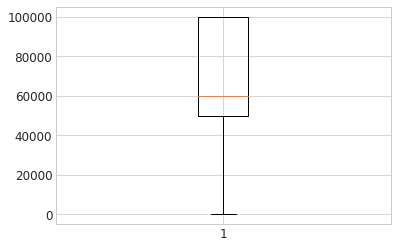

In [103]:
plt.boxplot(df.salary_ru)
plt.show

диапазон зарплат

In [116]:
df['band_salary'] = 0
for i in range(len(df.salary_ru)):
    if df.salary_ru[i] > 0 and df.salary_ru[i] <= 50000:
        df['band_salary'][i] = 'до 50 т.р.'
    elif df.salary_ru[i] > 50000 and df.salary_ru[i] <= 90000:
        df['band_salary'][i] = 'от 50 до 90 т.р.'
    elif df.salary_ru[i] > 90000:
        df['band_salary'][i] = 'больше 90 т.р.'
    else:
        df['band_salary'][i] = 'no data'

/tmp/ipykernel_299/3465477933.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['band_salary'][i] = 'больше 90 т.р.'


In [117]:
df.band_salary.value_counts().reset_index()

,index,band_salary
0,до 50 т.р.,20455
1,от 50 до 90 т.р.,17128
2,больше 90 т.р.,16605
3,no data,4


<function matplotlib.pyplot.show(close=None, block=None)>

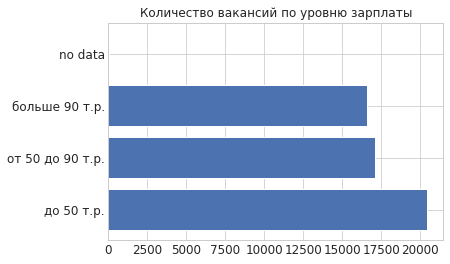

In [126]:
plt.barh(
    df.band_salary.value_counts().index,
    df.band_salary.value_counts().values
)
plt.title('Количество вакансий по уровню зарплаты')
plt.show

### Анализируем количество и частоту специализаций

Цель: создать таблицу **'specializations_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. 

#### Агрегируем данные по тегу name колонки 'specializations'

In [ ]:
df.specializations

пишем функцию для получения тега 'name'

In [60]:
def get_tag_name(jsn):
    text = json.loads(jsn)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['name'])
            return out
    except:
        print('error')

создаем столбец 'specializations_name', вытаскиваем тег 'name' из колонки 'specializations'

In [61]:
df['specializations_name'] = df.specializations_jsn.apply(get_tag_name)

In [ ]:
df['specializations_name']

In [62]:
specializations_region = df[['specializations_name', 'region']].explode('specializations_name')

In [63]:
specializations_region

,specializations_name,region
0,Компьютерная безопасность,Москва
0,"Консалтинг, Аутсорсинг",Москва
1,Компьютерная безопасность,Москва
1,Развитие бизнеса,Москва
1,Аналитик,Москва
...,...,...
54190,Аналитик,Чукотский АО
54190,Аналитик,Чукотский АО
54190,Другое,Чукотский АО
54191,"Информационные технологии, Интернет, Мультимедиа",Чукотский АО


удаляем строки, не относящиеся к IT-специализации

In [64]:
specializations_region['specializations_name'] = specializations_region['specializations_name'].str.lower()

Сепарируем столбец 'specializations_name': 1) с наименованиями из списка 'lst_not_it' 2) остальное

In [65]:
pat = '|'.join(lst_not_it)
temp_ = specializations_region[specializations_region['specializations_name'].str.contains(pat)]
it_sp = specializations_region[~specializations_region.index.isin(temp_.index)]

In [66]:
temp_.shape

(18061, 2)

In [67]:
it_sp.shape

(198117, 2)

In [68]:
specialization_frequency = (it_sp
                .specializations_name
                .value_counts()
                .reset_index()
)

In [ ]:
specialization_frequency

Переименуем столбцы

In [69]:
specialization_frequency = specialization_frequency.rename(columns={'index': 'specialization', 'specializations_name': 'frequency'})

In [70]:
specialization_frequency

,specialization,frequency
0,инженер,32246
1,"программирование, разработка",21368
2,системы управления предприятием (erp),18146
3,"поддержка, helpdesk",15238
4,системный администратор,15163
...,...,...
150,пожарная безопасность,1
151,тендеры,1
152,"проектирование, архитектура",1
153,управление предприятием,1


Специализация с частотой больше 500

In [146]:
specialization_frequency[specialization_frequency.frequency > 500]

,specialization,frequency
0,инженер,32246
1,"программирование, разработка",21368
2,системы управления предприятием (erp),18146
3,"поддержка, helpdesk",15238
4,системный администратор,15163
5,web инженер,14354
6,web мастер,14326
7,интернет,12307
8,аналитик,11636
9,другое,11508


<function matplotlib.pyplot.show(close=None, block=None)>

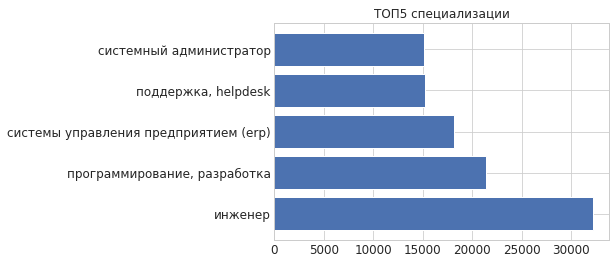

In [149]:
plt.barh(
    specialization_frequency[specialization_frequency.frequency > 15000].specialization.values,
    specialization_frequency[specialization_frequency.frequency > 15000].frequency.values
)
plt.title('ТОП5 специализации')
plt.show

### Анализируем количество и частоту навыков

Цель: создать таблицу **'skills_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. 

#### Агрегируем по тегу name колонки 'key_skills'

In [66]:
df.key_skills.iloc[1]

"[{'name': 'Информационная безопасность'}, {'name': 'Запуск новых продуктов'}, {'name': 'Анализ рынка'}, {'name': 'Бизнес-анализ'}, {'name': 'Управление продуктом'}, {'name': 'Маркетинговое планирование'}]"

Заменяем вложенные двойные кавычки на символ '|'. это позволит не ловить ошибку и при этом не затрудняет чтение и анализ данных

In [72]:
def text_replace(text):
    return text.replace('"', '|').replace("'", '"')



In [73]:
df['key_skills_jsn'] = df.key_skills.apply(text_replace).apply(text_to_json_dumps)

In [ ]:
df.key_skills_jsn

In [76]:
df.key_skills_jsn.value_counts().head(1)

[]    9337
Name: key_skills_jsn, dtype: int64

создаем новый столбец key_skills_name

In [77]:
def get_tag_name_(text):
    try:
        text = json.loads(text)
        out = []
        if len(text) > 2:
            for i in text:
                out.append(i['name'])
            return out
    except:
        return []

In [78]:
df['key_skills_name'] = df.key_skills_jsn.apply(get_tag_name_)

In [85]:
df['key_skills_name'].isna().sum()

11899

None заменяем на 'нет информации'

In [93]:
df['key_skills_name'] = df['key_skills_name'].fillna('нет информации')

создаем таблицу из столбцов 'key_skills_name', 'salary_ru'

In [94]:
skill_salary = df[['key_skills_name', 'salary_ru']].explode('key_skills_name')

In [95]:
skill_salary

,key_skills_name,salary_ru
0,Информационная безопасность,100000.0
0,Аудит информационной безопасности,100000.0
0,ФЗ-152,100000.0
0,382-П,100000.0
0,683-П,100000.0
...,...,...
54191,Информационная безопасность,0.0
54191,Управление проектами,0.0
54191,Деловая коммуникация,0.0
54191,Управление процессами,0.0


подсчитываем частоту key_skills_name в таблице skills_frequency

In [96]:
skills_frequency = (skill_salary
                .key_skills_name
                .value_counts()
                .reset_index()
)

In [97]:
skills_frequency = skills_frequency.rename(columns={'index': 'skills', 'key_skills_name': 'frequency'})

In [98]:
skills_frequency

,skills,frequency
0,нет информации,11899
1,SQL,6211
2,Linux,4815
3,Работа в команде,4635
4,Git,4560
...,...,...
13540,НПА,1
13541,окдп,1
13542,Оформление нерезидентов из визовых стран,1
13543,Проектный офис,1


### Анализируем вакансии в столбце 'name'

Смотрим группировку вакансий по наименованию

Посмотрим ТОП вакансий по столбцу name

In [99]:
df.name.value_counts().loc[lambda x: x>200].reset_index()

,index,name
0,Системный администратор,1652
1,Программист 1С,1122
2,Специалист технической поддержки,481
3,Системный аналитик,465
4,Аналитик,346
5,Инженер-программист,330
6,Программист 1C,325
7,Графический дизайнер,312
8,Инженер технической поддержки,273
9,Бизнес-аналитик,272


Посмотрим количество сгруппированных вакансий

In [100]:
df.name.value_counts().loc[lambda x: x>1].sum()

32596

21 тыс. вакансий не сгруппировалось

In [85]:
df.name.value_counts().loc[lambda x: x==1].sum()

21490

#### описательная статистика

In [ ]:
# Описательная статистика для числовых столбцов датасета
df.describe()

In [ ]:
# Описательная статистика для нечисловых столбцов датасета
df.describe(include=['object', 'bool'])